## Thera Bank Personal Loan Campaign

## Context
This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

## Objective
The classification goal is to predict the likelihood of a liability customer buying personal loans. The target variable in this dataset is 'Personal Loan'.

## Attribute Information:
- ID: CustomerID
- Age: Customer's age in completedyears
- Experience: #years of professionalexperience
- Income: Annual income of the customer(000)
- ZIP Code: Home Address ZIPcode.
- Family: Family size of thecustomer
- CCAvg: Avg. spending on credit cards per month(000)
- Education: Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional
- Mortgage: Value of house mortgage if any.(000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign? 
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- CreditCard: Does the customer use a credit card issued by the bank?

----------------------

## Index

----------------------
- <a href = #link1>Q1 - Import Libraries and Load Dataset </a>


- <a href = #link2>Q2 - EDA</a> 


- <a href = #link3>Q3 - Split the data into training and test set</a>


- <a href = #link4>Q4 - Build the Logistic Regression model</a> 


- <a href = #link5>Q5 - Show coefficients of all the attributes in a data frame with column names</a>


- <a href = #link6>Q6 - Business Insights</a>

### <a id = "link1"></a> 1. Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing libaries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
# Update default background style of plots
sns.set_style(style='darkgrid')

In [76]:
# importing data

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()      # used to see top 5 rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [6]:
df.dtypes        ## this would give datatype of each column

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Initial Data Cleanup

In [78]:
## Drop unwanted columns 
df.drop(['ID','ZIP Code'],axis=1,inplace=True)
#df = df.drop(['ID','ZIP Code'],axis=1)

# dropping 'ID' column as it all the unique value and this column wont provide any insight to build a model
# Zip Code represents region and region wise distribution of customers is not helping here
# as 467 zip codes over 5K records will not be useful

In [77]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.isnull().sum()  #check for null Values

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## EDA

### <a id = "link2"></a>2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

Number of unique in each column?

Number of people with zero mortgage?

Number of people with zero credit card spending per month?

Value counts of all categorical columns.

Univariate and Bivariate

Get data model ready

In [ ]:
# Column descriptions

## Data Description:

##	ID	Customer ID

##	Age	Customer's age in completed years (Discrete as numeric rounded to year)

##	Experience	#years of professional experience (Discrete as numeric rounded to year)

##	Income	Annual income of the customer ($000) (Continous numeric value)

##	ZIPCode	Home Address ZIP code. (Categorical value)

##	Family	Family size of the customer (Categorical value or discrete numeric?)

##	CCAvg	Avg. spending on credit cards per month ($000) (Continous numeric value)

##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional (Categorical value or discrete numeric?)

##	Mortgage	Value of house mortgage if any. ($000) (Continous numeric value)

##	Securities Account	Does the customer have a securities account with the bank? 0 - False and 1 - True (Binary categorical value)

##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank? 0 - False and 1 - True (Binary categorical value)

##	Online	Does the customer use internet banking facilities? 0 - False and 1 - True (Binary categorical value)

##	CreditCard	Does the customer use a credit card issued by UniversalBank? 0 - False and 1 - True (Binary categorical value)


##	Personal Loan	Did this customer accept the personal loan offered in the last campaign? 0 - False and 1 - True (Target Variable)

In [11]:
cat_features = ['Securities Account', 'CD Account', 'Online', 'CreditCard','Family','Education']
continous_features = [ 'Income', 'CCAvg', 'Mortgage']
discrete_features = ['Age','Experience']

#### 2.1. Unique Values per Column

In [12]:
df.nunique()
# gives number of unique values in each column

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### 2.2. Number of people with zero mortgage?

In [13]:
len(df[df['Mortgage']==0])

#count of people having home mortgage as zero, Most of the people donot have mortgage

3462

#### 2.3. Number of people with zero credit card spending per month?

In [14]:
len(df[df['CCAvg']==0])

#count of people having zero monthly spending on credit card

106

#### 2.4. Value counts of all categorical columns.

In [15]:
## Binaries
vc = df[['CreditCard','CD Account','Online','CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']

print("Binary Categoricals:")
display(vc)


## Additional - Value counts of low value discrete columns
for i in ['Family','Education']:
    print(i)
    display(df[i].value_counts(dropna = False))


Binary Categoricals:


,Col_Name,Value_Count_1,Value_Count_0
0,CreditCard,1470,3530
1,CD Account,302,4698
2,Online,2984,2016
3,CreditCard,1470,3530


Family


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Education


1    2096
3    1501
2    1403
Name: Education, dtype: int64

#### 2.5.1. Univariate Analysis

###### Continous Numeric Values

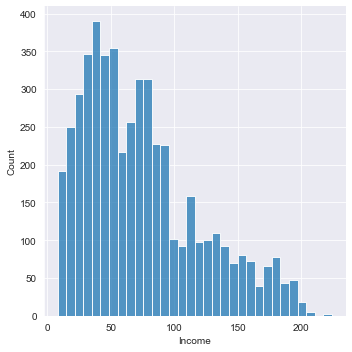

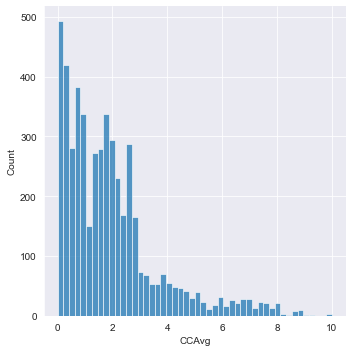

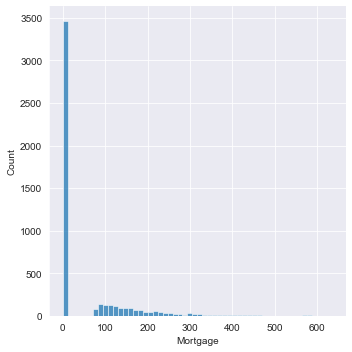

In [16]:
# Distributions - Continous 
for col in continous_features:

    sns.displot(df[col])
    plt.show()
    


###### Discrete Numeric Values

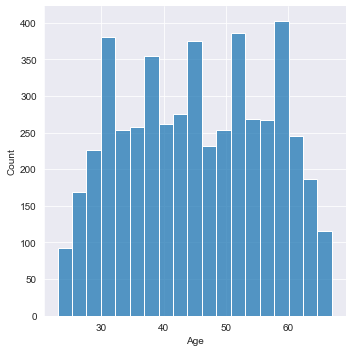

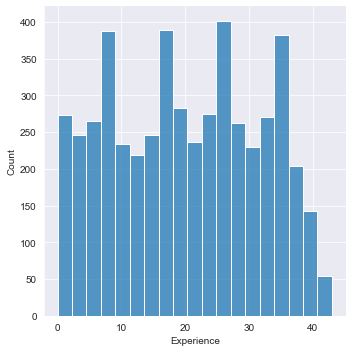

In [17]:
## Large Discrete values
sns.displot(df['Age'])
plt.show()
sns.displot(df['Experience'])
plt.show()

###### Categorical Values

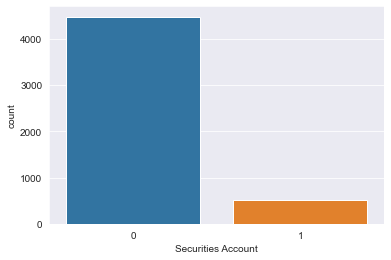

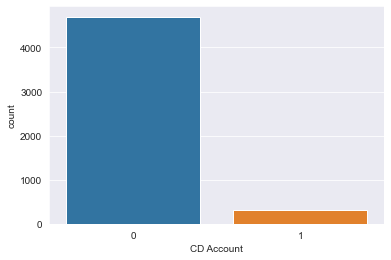

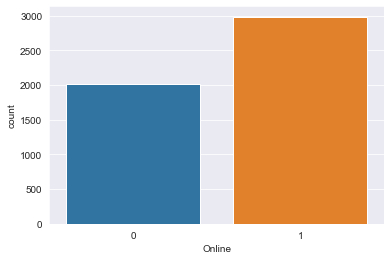

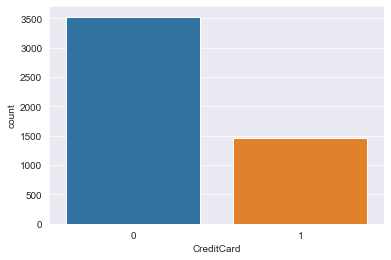

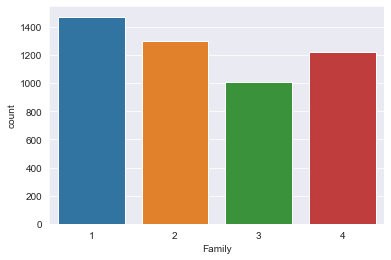

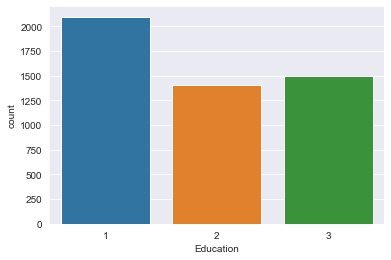

In [18]:
for col in cat_features:
    sns.countplot(df[col])
    plt.show()


###### Target Variable

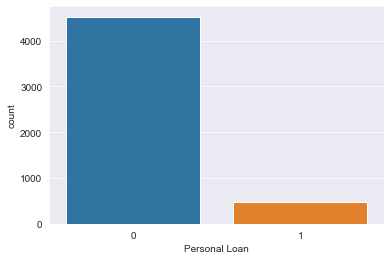

In [19]:
sns.countplot(df['Personal Loan'])
plt.show()

#### 2.5.2. Bivariate Analysis

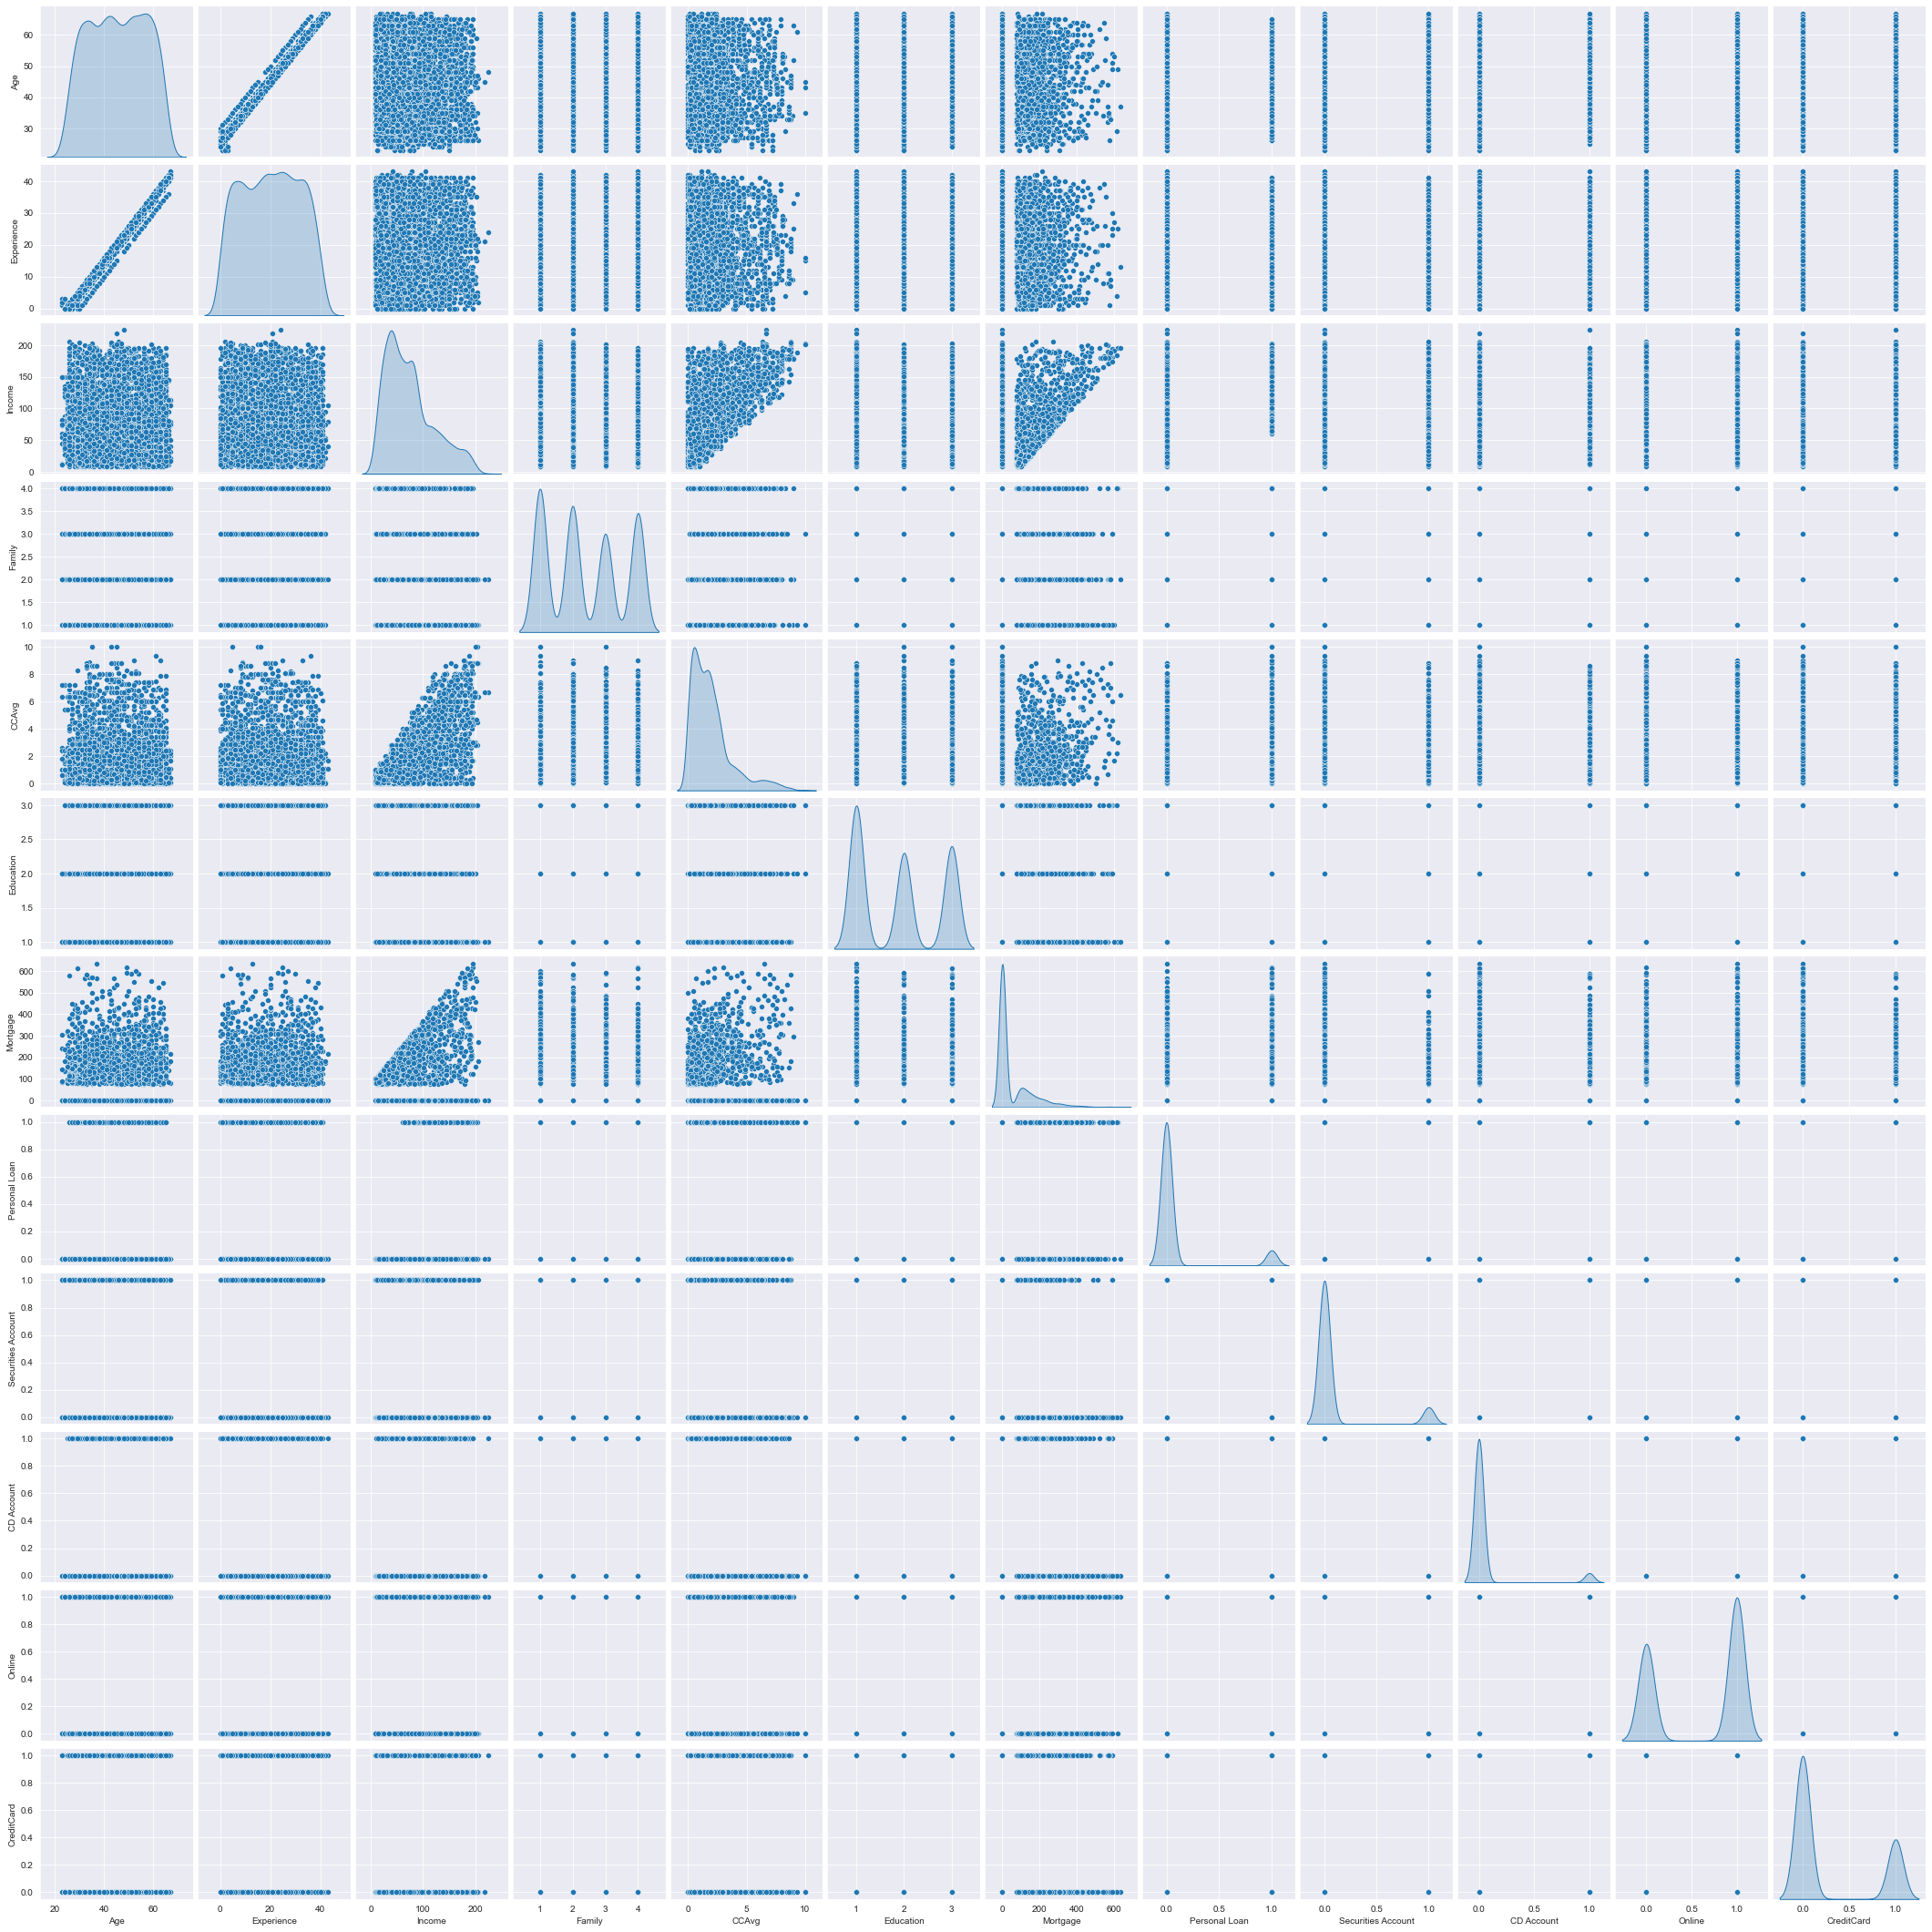

In [20]:
## Pairplots for all features
sns.pairplot(df,diag_kind='kde')
plt.show()

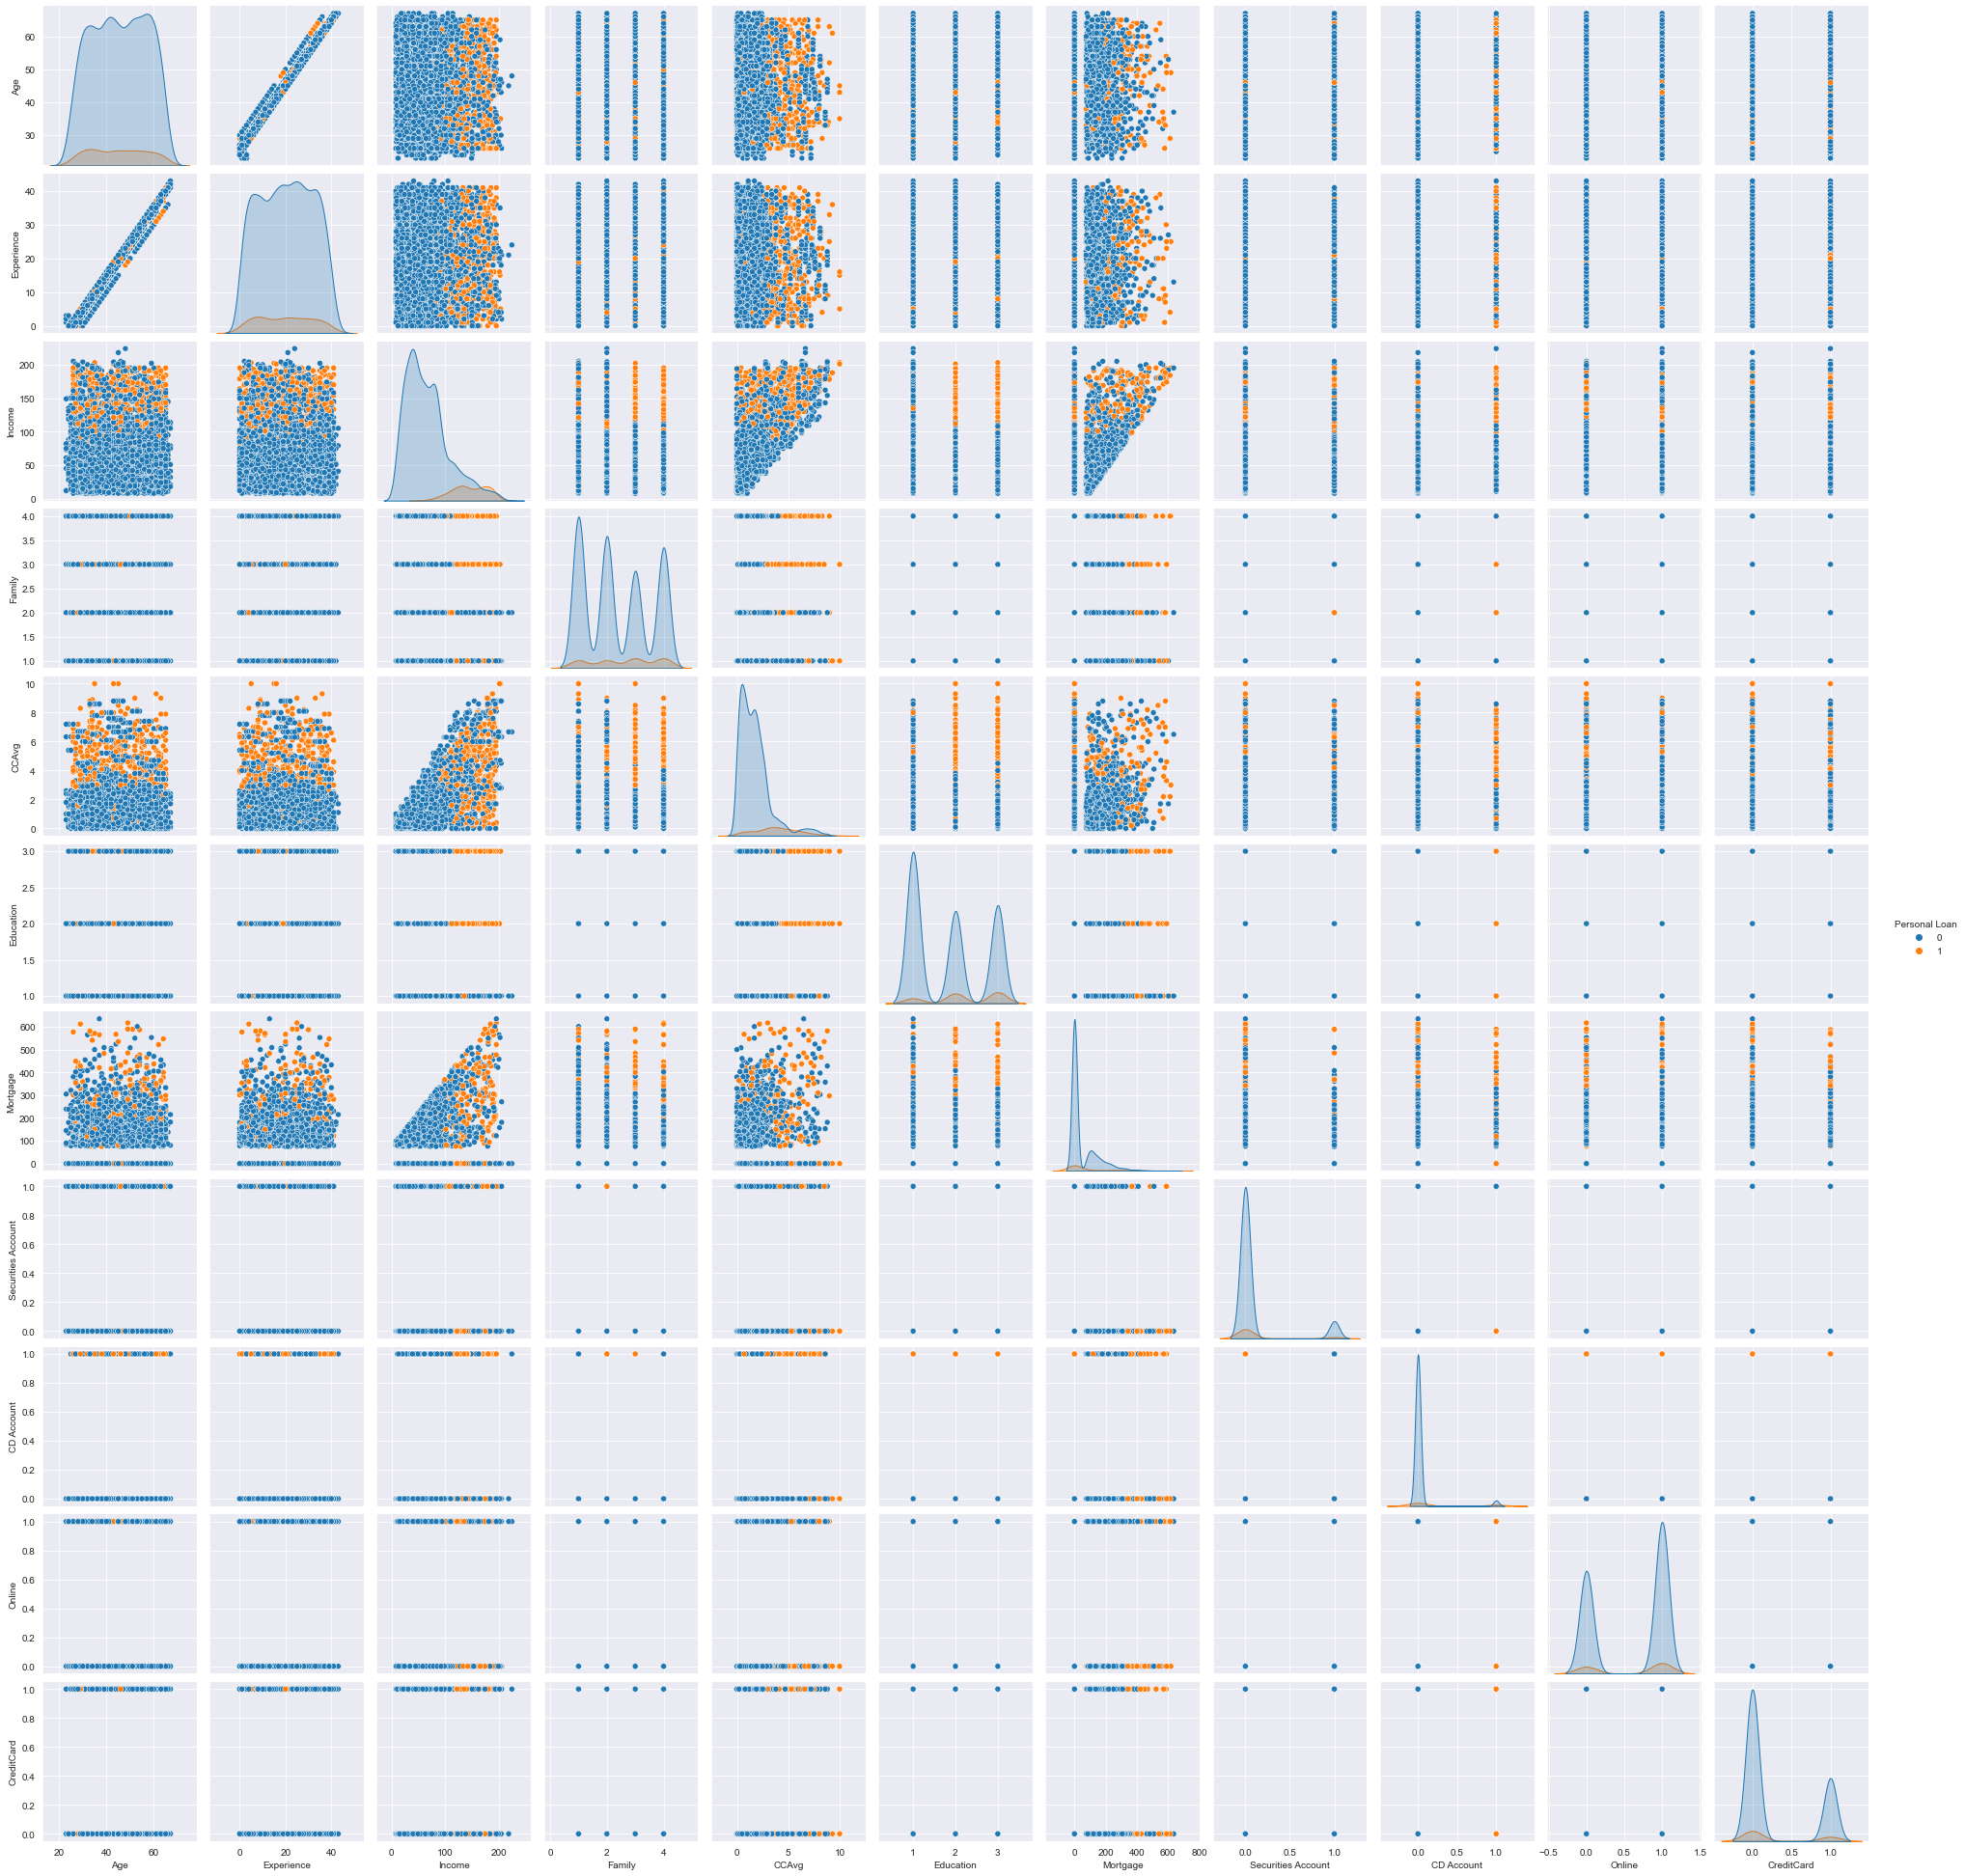

In [21]:
# Check distributions by Target Variable
sns.pairplot(df, hue = 'Personal Loan')
plt.show()

###### Categorical Features

In [82]:
for col in cat_features:
    display(pd.crosstab(df['Personal Loan'], df[col],normalize='columns'))

Securities Account,0,1
Personal Loan,,
0,0.906208,0.885057
1,0.093792,0.114943


CD Account,0,1
Personal Loan,,
0,0.927629,0.536424
1,0.072371,0.463576


Online,0,1
Personal Loan,,
0,0.90625,0.90248
1,0.09375,0.09752


CreditCard,0,1
Personal Loan,,
0,0.904533,0.902721
1,0.095467,0.097279


Family,1,2,3,4
Personal Loan,,,,
0,0.92731,0.91821,0.868317,0.890344
1,0.07269,0.08179,0.131683,0.109656


Education,1,2,3
Personal Loan,,,
0,0.95563,0.870278,0.863424
1,0.04437,0.129722,0.136576


`When CreditCard value is 0 or 1 in both cases the distribution of target variable is same therefore we should drop CreditCard`

###### Discrete Variables

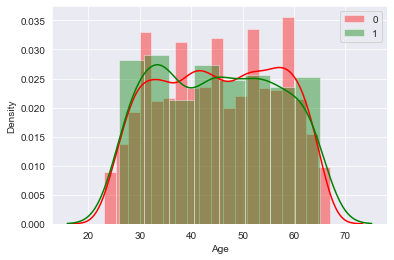

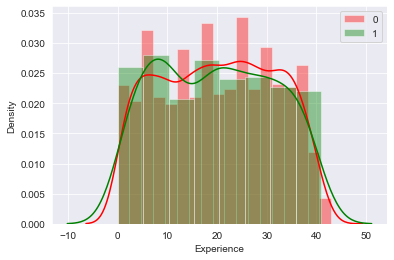

In [23]:
for col in ['Age','Experience']:
    sns.distplot(df[df['Personal Loan']==0][col],color='r',label=0)
    sns.distplot(df[df['Personal Loan']==1][col],color='g',label=1)
    plt.legend()
    plt.show()


###### Continous Values

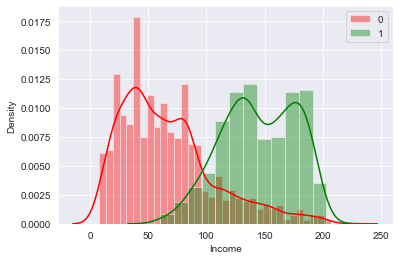

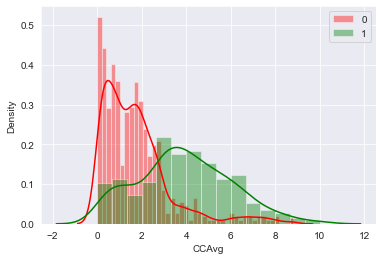

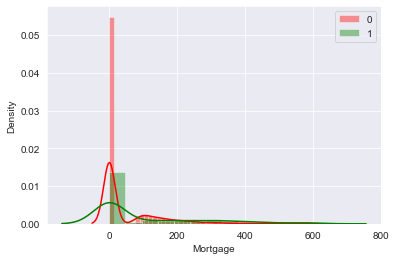

In [24]:
for col in continous_features:
    sns.distplot(df[df['Personal Loan']==0][col],color='r',label=0)
    sns.distplot(df[df['Personal Loan']==1][col],color='g',label=1)
    plt.legend()
    plt.show()

# Most people with zero motgage are not taking personal loans

`Most people with zero motgage are not taking personal loans - lets create a binary feature to capture this`

###### Correlations

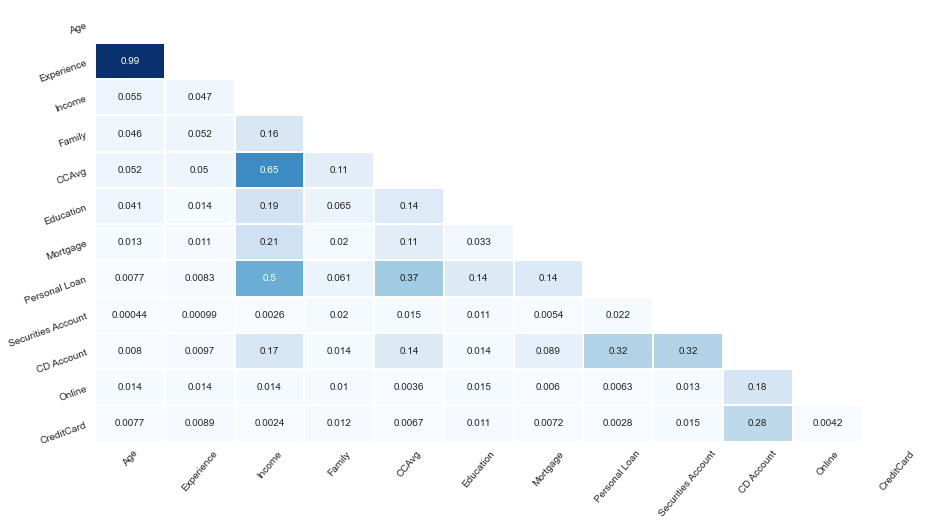

In [25]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

`Age and Experience has 0.99 correlation therefore dropping Experience`

###### Add Mortgage Categorical Feature

In [83]:
## Additional

### New variable extracted from mortgage

df['Mortgage_category'] = df['Mortgage'].apply(lambda x:1 if x>=1 else 0)
# Here, lambda function gives output as 1 whenever 'Mortgage' value is greater than or equal to 1 else it gives 0
## These outputs are stored ina new column 'Mortgage_category'

df['Mortgage_category'] = df['Mortgage_category'].astype('category') # Converting column to 'category' datatype

df['Mortgage_category'].value_counts()

0    3462
1    1538
Name: Mortgage_category, dtype: int64

#### 2.6. Final Data Cleanup for Model

In [84]:
df.drop('CreditCard', axis=1,inplace=True)
#### When CreditCard value is 0or 1 in both cases the distribution of target variable is same therefore we should drop CreditCard

In [85]:
df.drop('Experience', axis=1,inplace=True)
#### Age and Experience has 0.99 correlation therefore dropping Experience

In [87]:
## Convert non-binary categories to categorical
df[['Family','Education','Securities Account','CD Account','Online']] = df[['Family','Education','Securities Account','CD Account','Online']].astype('category')

In [88]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,Mortgage_category
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,0


### <a id = "link3"></a>3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [89]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [90]:
x = pd.get_dummies(x, drop_first=True)

In [56]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [91]:
x.head()

,Age,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,Mortgage_category_1
0,25,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,45,1.0,0,0,0,1,1,0,0,0,0,0


In [58]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code
# if random state is not mentioned it would generate different train test sample in every run
# test_size is to select the size of test data

# two variables taken for split therefore output will generate 4 variables: test train for x and test train for y

In [59]:
xtrain.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
717,59,94,0.5,0,0,0,0,0,1,0,0,0,0
2496,63,32,0.7,141,0,0,0,0,1,0,1,0,1
2469,43,89,0.1,307,0,0,0,0,0,0,1,0,1
1375,50,179,2.9,0,0,0,0,0,0,0,0,1,0
2742,39,89,0.4,0,0,0,1,1,0,0,0,0,0


In [60]:
xtest.head()

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1
3406,42,34,2.0,0,0,0,0,0,1,0,0,1,0
757,52,81,1.8,0,1,0,0,0,1,0,1,0,0
3624,58,70,1.4,0,0,0,0,0,0,0,0,1,0
4544,28,80,2.5,0,0,0,1,0,1,0,0,0,0
3235,60,39,1.6,0,0,0,1,1,0,0,0,1,0


### <a id = "link4"></a>4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

#### Base Model

In [61]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7, max_iter = 100 )  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9511428571428572

Testing accuracy 0.958


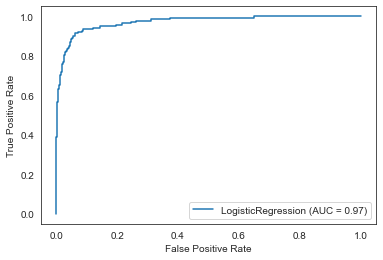

In [64]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, xtest, ytest)
plt.show()

# roc_auc_score(ytest, model.predict_proba(xtest)[:,1])

In [ ]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [65]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## importing necessary metrics to evaluate model performance

In [42]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] , cmap='Blues')
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

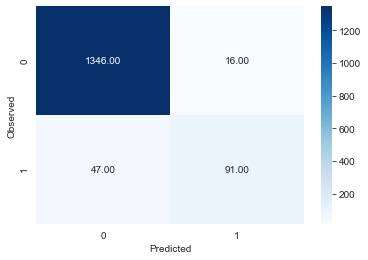

In [66]:
draw_cm(ytest,y_predict)

In [67]:
recall_score(ytest,y_predict)

0.6594202898550725

In [68]:
precision_score(ytest,y_predict)

0.8504672897196262

In [69]:
f1_score(ytest,y_predict)

0.742857142857143

In [47]:
#!pip install yellowbrick

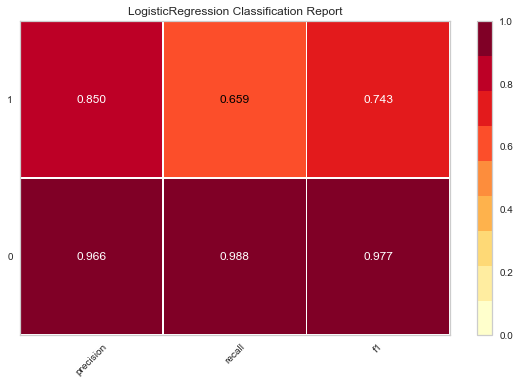

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [72]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()


### <a id = "link5"></a>5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [73]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = xtrain.columns
fi['Coeff'] = np.round(abs(model.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
5,CD Account,3.58
11,Education_3,3.18
10,Education_2,2.95
4,Securities Account,1.10
12,Mortgage_category_1,0.88
6,Online,0.71
9,Family_4,0.65
7,Family_2,0.61
8,Family_3,0.60
2,CCAvg,0.25


In [74]:
# Observe the predicted and observed classes in a dataframe.

z = xtest.copy()
z['Observed Loan Status'] = ytest
z['Predicted Loan Status'] = y_predict
z[z['Observed Loan Status']!=z['Predicted Loan Status']]

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_category_1,Observed Loan Status,Predicted Loan Status
4575,53,115,0.5,0,0,0,0,1,0,0,0,1,0,1,0
78,54,133,2.6,0,0,0,0,1,0,0,0,1,0,1,0
3383,46,135,4.1,213,0,0,1,0,1,0,0,0,1,1,0
459,35,200,3.0,458,0,0,0,1,0,0,0,0,1,0,1
2304,27,170,4.7,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,46,125,4.7,0,0,0,1,1,0,0,0,1,0,1,0
2194,34,123,1.6,0,0,0,1,0,0,0,1,0,0,1,0
927,65,95,3.7,138,0,0,0,0,1,0,1,0,1,1,0
4163,54,108,1.9,0,0,0,1,0,0,1,1,0,0,1,0


`63 rows where predicted target variable is not equal to actual target variable`

### <a id = "link6"></a>6. Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted Personal loan will be taken and the customer took it

*False Positive (observed=0,predicted=1):*

Predicted Personal loan will be taken and the customer did not take it

*True Negative (observed=0,predicted=0):*

Predicted Personal loan will not be taken and the customer did not take it

*False Negative (observed=1,predicted=0):*

Predicted Personal loan will not be taken and the customer took it

##### `Important Features`

"CD Account", "Education_3", "Education_2", "Securities Account" 
seems to be top 4 features which influence the model's output. Based on the coefficients value.

"Age" and "Mortgage" doesn't play any role in predicting the target variable.

##### `Important Metric`

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. **less number of False Negative**, so that bank doesn't lose real customers who want to take loan. Hence the **focus should be on increasing Recall**.

After achieving the desired recall we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.

## Appendix:

- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **heatmap** : Draw a heatmap of rectangular data as a color-encoded matrix.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LogisticRegression** : Logistic Regression (aka logit, MaxEnt) classifier.

- **yellowbrick** : Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it  uses Matplotlib